In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np

def generateLaticeSpots(nstrings = 10):

    offset = np.pi*(1./6)
    anglediff = np.pi*(1./3)
    neighbourangles = [offset, anglediff+offset,2.0*anglediff+offset, 3.0*anglediff+offset, 4.0*anglediff+offset, 5.0*anglediff+offset]

    stringposx = [0.0]
    stringposy = [0.0]
    theta = [0.0]
    spacing = 50.0

    while len(stringposx) < nstrings :

        minradius = 1000000.0
        minradstring = 0
        minradstringneighbours = 10000
        for i in range(len(stringposx)) :
                nneighbours = 0
                rad = np.sqrt((stringposx[i])**2.0+(stringposy[i])**2.0)
                for j in range(len(stringposx)):
                        if i==j :
                                continue
                        dist = np.sqrt((stringposx[j]-stringposx[i])**2.0+(stringposy[j]-stringposy[i])**2.0)
                        if dist<spacing*1.2 :
                                nneighbours += 1
                if nneighbours < len(neighbourangles) and rad <= minradius :
                        if rad < minradius :
                                minradius = rad;
                                minradstring = i
                                minradstringneighbours = nneighbours
                        elif nneighbours < minradstringneighbours :
                                minradius = rad
                                minradstring = i
                                minradstringneighbours = nneighbours

        maxneighours = 0
        maxneighbourstring = 0
        for j in range(len(neighbourangles)) :
                newposx = stringposx[minradstring]+spacing*np.sin(neighbourangles[j])
                newposy = stringposy[minradstring]+spacing*np.cos(neighbourangles[j])

                nneighbours = 0
                overlap = False
                for k in range(len(stringposx)) :
                        dist = np.sqrt((newposx-stringposx[k])**2.0+(newposy-stringposy[k])**2.0)
                        if dist < spacing*0.8 :
                                nneighbours = 0
                                overlap = True
                        if dist<spacing*1.2 :
                                nneighbours += 1
                if nneighbours > maxneighours and not overlap:
                        maxneighours = nneighbours
                        maxneighbourstring = j
        stringposx.append(stringposx[minradstring]+spacing*np.sin(neighbourangles[maxneighbourstring]))
        stringposy.append(stringposy[minradstring]+spacing*np.cos(neighbourangles[maxneighbourstring]))
        theta.append(neighbourangles[maxneighbourstring])

    mean_x = sum(stringposx)/len(stringposx)
    mean_y = sum(stringposy)/len(stringposy)

    for i in range(len(stringposx)):
        stringposx[i] = (stringposx[i]-mean_x)/spacing
        stringposy[i] = (stringposy[i]-mean_y)/spacing

    return stringposx, stringposy, theta

In [3]:
def rec_cluster(nstrings):
    '''
    
    '''
    stringposx = [-0.5, 0.5, -0.5, 0.5,-0.5, 0.5,-0.5, 0.5,-0.5, 0.5]
    stringposy = [-2,-2,-1,-1,0,0,1,1,2,2]
    
    
    
    theta = 'dummy'
    
    #return coordinate lists
    return stringposx, stringposy, theta

In [4]:
def rec_cluster_offset(nstrings):
    '''
    Rectangular cluster with offset strings instead of laterally spaced
    '''
    stringposx = [0.4330127018922193,
                 0.4330127018922193,
                 0.4330127018922193,
                 0.4330127018922193,
                 0.4330127018922193,
                 -0.4330127018922193,
                 -0.4330127018922193,
                  -0.4330127018922193,
                  -0.4330127018922193,
                  -0.4330127018922193]
    stringposy = [-2,-1,0,1,2, -1.5, -0.5, 0.5, 1.5, 2.5]
    
    
    
    theta = 'dummy'
    
    #return coordinate lists
    return stringposx, stringposy, theta

In [5]:
base = np.sqrt(1-0.5**2)
print(base/2)


0.4330127018922193


(-2.0, 2.0)

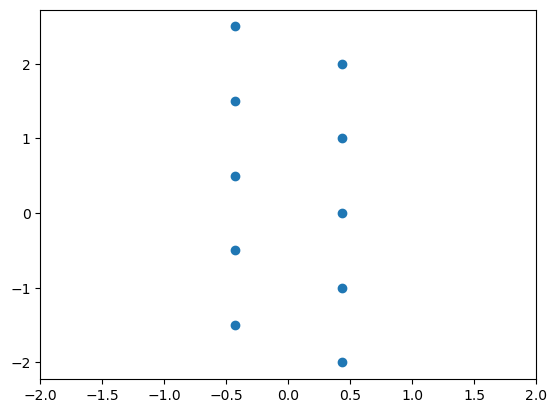

In [6]:
x, y, th = rec_cluster_offset(10)
plt.scatter(x, y)
plt.xlim(-2, 2)


In [5]:
spacing = 50
clusterspacing = 400
stringposx, stringposy, theta = rec_cluster_offset(10)

clusterposx, clusterposy, clustertheta = generateLaticeSpots(7)

clustertheta = [0, 3*np.pi/4, np.pi/2, np.pi/4, -np.pi/4, -np.pi/2, -3*np.pi/4] 
#clustertheta = [0, np.pi/6, -np.pi/6, np.pi/2, np.pi/6, -np.pi/6, np.pi/2]

FinalStringx = []
FinalStringy = []

for i in range(len(clusterposx)) :
    for j in range(len(stringposx)):
        if i == 0 : 
            FinalStringx.append(stringposx[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(stringposy[j]*spacing + clusterposy[i]*clusterspacing)
        else :
            FinalStringx.append(np.cos(clustertheta[i])*stringposx[j]*spacing - np.sin(clustertheta[i])*stringposy[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(np.sin(clustertheta[i])*stringposx[j]*spacing + np.cos(clustertheta[i])*stringposy[j]*spacing + clusterposy[i]*clusterspacing)
            
mean_x = sum(FinalStringx)/len(FinalStringx)
mean_y = sum(FinalStringy)/len(FinalStringy)

for i in range(len(FinalStringx)):
    FinalStringx[i] -= mean_x
    FinalStringy[i] -= mean_y

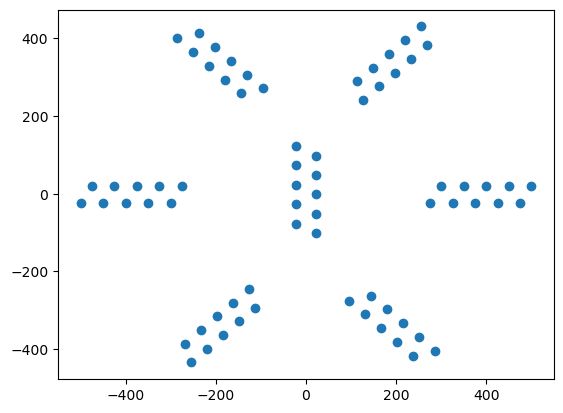

In [6]:
plt.scatter(FinalStringx, FinalStringy)
plt.savefig(fname = 'offset_rectangles.png', format = 'png')

In [9]:
def circ_cluster(nstrings):
    '''
    spaces strings evenly on a circle of radius 1
    '''
    theta = 0
    stringposx = [0]
    stringposy = [0]
    for i in range(nstrings-1):
        stringposx.append(np.cos(theta))
        stringposy.append(np.sin(theta))
        theta += 2*np.pi/(nstrings-1)
    
    return stringposx, stringposy, theta

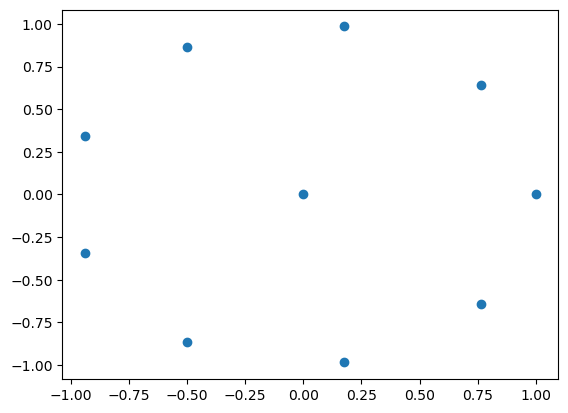

In [10]:
x, y, th = circ_cluster(10)
plt.scatter(x, y)

In [11]:
def arrow_cluster(nstrings):
    stringposx = [0,0, -1.5, 1.5]
    stringposy = [2*np.sin(-np.pi/3),-2*np.sin(-np.pi/3), np.sin(-np.pi/3), np.sin(-np.pi/3)]
    theta = 0
    for i in range(nstrings-4):
        stringposx.append(np.cos(theta))
        stringposy.append(np.sin(theta))
        theta += 2*np.pi/(nstrings-4)
    
    
    
    
    return stringposx, stringposy, theta

(-2.0, 2.0)

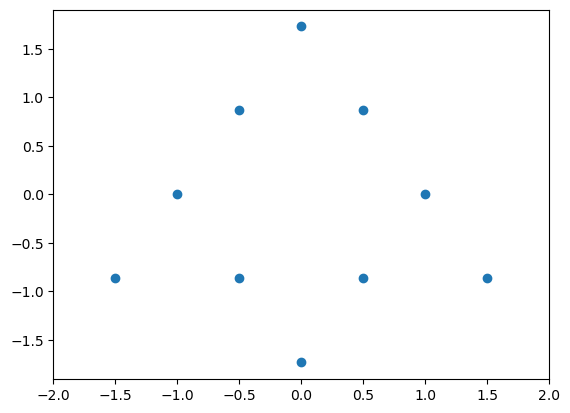

In [12]:
x, y, th = arrow_cluster(10)
plt.scatter(x, y)
plt.xlim(-2, 2)

In [13]:
spacing = 50
clusterspacing = 400
stringposx, stringposy, theta = arrow_cluster(10)

clusterposx, clusterposy, clustertheta = generateLaticeSpots(7)

clustertheta = [0, 3*np.pi/4, np.pi/2, np.pi/4, -np.pi/4, -np.pi/2, -3*np.pi/4] 
#clustertheta = [0, np.pi/6, -np.pi/6, np.pi/2, np.pi/6, -np.pi/6, np.pi/2]

FinalStringx = []
FinalStringy = []

for i in range(len(clusterposx)) :
    for j in range(len(stringposx)):
        if i == 0 : 
            FinalStringx.append(stringposx[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(stringposy[j]*spacing + clusterposy[i]*clusterspacing)
        else :
            FinalStringx.append(np.cos(clustertheta[i])*stringposx[j]*spacing - np.sin(clustertheta[i])*stringposy[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(np.sin(clustertheta[i])*stringposx[j]*spacing + np.cos(clustertheta[i])*stringposy[j]*spacing + clusterposy[i]*clusterspacing)
            
mean_x = sum(FinalStringx)/len(FinalStringx)
mean_y = sum(FinalStringy)/len(FinalStringy)

for i in range(len(FinalStringx)):
    FinalStringx[i] -= mean_x
    FinalStringy[i] -= mean_y

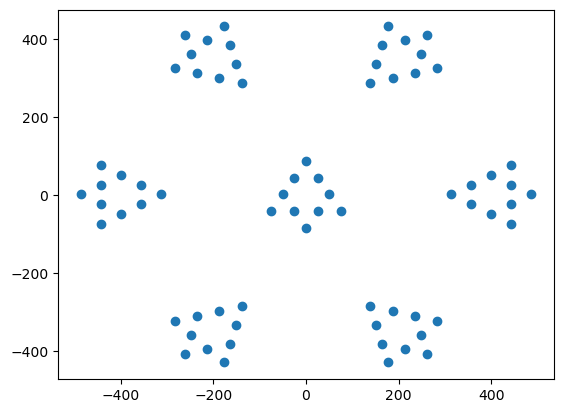

In [14]:
plt.scatter(FinalStringx, FinalStringy)

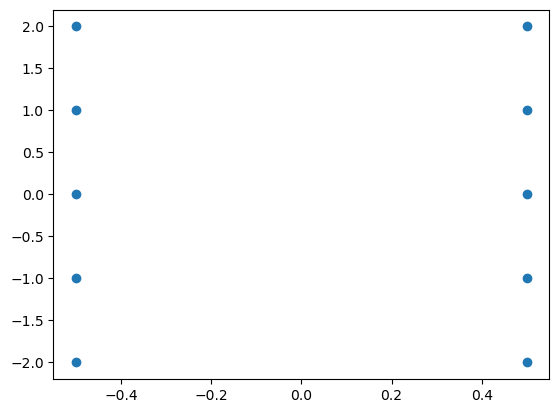

In [15]:
x, y, th = rec_cluster(nstrings = 10)
plt.scatter(x, y)

In [16]:
spacing = 80
clusterspacing = 600
stringposx, stringposy, theta = rec_cluster(10)

clusterposx, clusterposy, clustertheta = generateLaticeSpots(7)

clustertheta = [0, np.pi/6, -np.pi/6, np.pi/2, np.pi/6, -np.pi/6, np.pi/2] 

FinalStringx = []
FinalStringy = []

for i in range(len(clusterposx)) :
    for j in range(len(stringposx)):
        if i == 0 : 
            FinalStringx.append(stringposx[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(stringposy[j]*spacing + clusterposy[i]*clusterspacing)
        else :
            FinalStringx.append(np.cos(clustertheta[i])*stringposx[j]*spacing - np.sin(clustertheta[i])*stringposy[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(np.sin(clustertheta[i])*stringposx[j]*spacing + np.cos(clustertheta[i])*stringposy[j]*spacing + clusterposy[i]*clusterspacing)
            
mean_x = sum(FinalStringx)/len(FinalStringx)
mean_y = sum(FinalStringy)/len(FinalStringy)

for i in range(len(FinalStringx)):
    FinalStringx[i] -= mean_x
    FinalStringy[i] -= mean_y

(-1000.0, 1000.0)

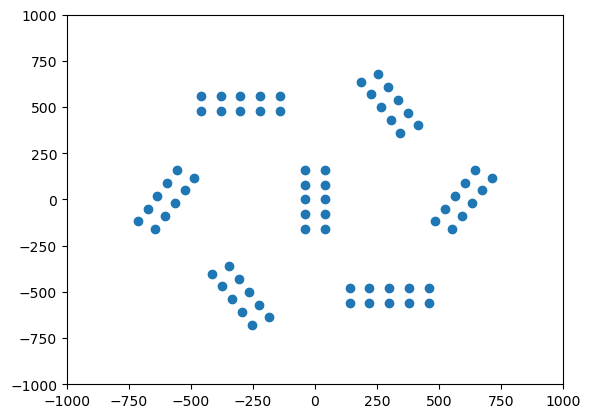

In [17]:
plt.scatter(FinalStringx, FinalStringy)
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)

In [18]:
spacing = 50
clusterspacing = 400
stringposx, stringposy, theta = rec_cluster(10)

clusterposx, clusterposy, clustertheta = generateLaticeSpots(7)

clustertheta = [0, np.pi/3, 0, -np.pi/3, np.pi/3, 0, -np.pi/3] 

FinalStringx = []
FinalStringy = []

for i in range(len(clusterposx)) :
    for j in range(len(stringposx)):
        if i == 0 : 
            FinalStringx.append(stringposx[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(stringposy[j]*spacing + clusterposy[i]*clusterspacing)
        else :
            FinalStringx.append(np.cos(clustertheta[i])*stringposx[j]*spacing - np.sin(clustertheta[i])*stringposy[j]*spacing + clusterposx[i]*clusterspacing)
            FinalStringy.append(np.sin(clustertheta[i])*stringposx[j]*spacing + np.cos(clustertheta[i])*stringposy[j]*spacing + clusterposy[i]*clusterspacing)
            
mean_x = sum(FinalStringx)/len(FinalStringx)
mean_y = sum(FinalStringy)/len(FinalStringy)

for i in range(len(FinalStringx)):
    FinalStringx[i] -= mean_x
    FinalStringy[i] -= mean_y

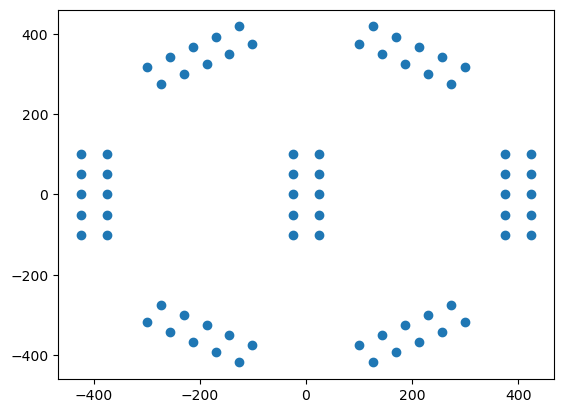

In [19]:
plt.scatter(FinalStringx, FinalStringy)